# Step 1: Install dependencies

In [11]:
!pip3 install torch torchvision torchaudio


[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
!git clone https://github.com/ultralytics/yolov5

fatal: destination path 'yolov5' already exists and is not an empty directory.


In [4]:
!cd yolov5 & pip install -r requirements.txt


[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# Step 2: Load YOLOv5 architecture

In [20]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [6]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in C:\Users\hp/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2022-11-23 Python-3.9.4 torch-1.13.0+cpu CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [7]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

Test YOLOv5 object detection using random image of traffic.

In [8]:
img = 'https://assets.bwbx.io/images/users/iqjWHBFdfxIU/iiInBb8oFPw0/v1/1000x-1.jpg'

In [9]:
results = model(img)
results.print()

image 1/1: 667x1000 17 cars, 2 buss, 1 truck
Speed: 662.1ms pre-process, 332.3ms inference, 15.8ms NMS per image at shape (1, 3, 448, 640)


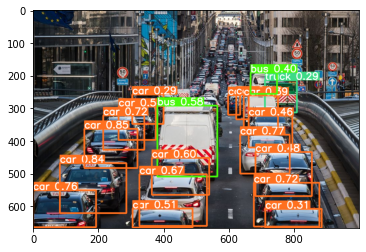

In [10]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

Implementing code to use the webcam.

In [12]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

# Step 3: Train Custom model

In [19]:
import uuid   # Unique identifier
import os
import time

In [43]:
IMAGES_PATH = os.path.join('data', 'images') #/data/images
labels = ['awake', 'drowsy']
number_imgs = 10

Create custom dataset via webcam captures.

In [38]:
cap = cv2.VideoCapture(0)
# Loop through labels
for label in labels:
    print('Collecting images for {}'.format(label))
    time.sleep(5)
    
    # Loop through image range
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        
        # Webcam feed
        ret, frame = cap.read()
        
        # Naming out image path
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        
        # Writes out image to file 
        cv2.imwrite(imgname, frame)
        
        # Render to the screen
        cv2.imshow('Image Collection', frame)
        
        # 2 second delay between captures
        time.sleep(2)
        
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()

In [39]:
print(os.path.join(IMAGES_PATH, labels[0]+'.'+str(uuid.uuid1())+'.jpg'))

data\img\awake.de3c660c-6b63-11ed-8299-782b46f59cbc.jpg


In [40]:
for label in labels:
    print('Collecting images for {}'.format(label))
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        print(imgname)   

data\img\awake.22befcd6-6b64-11ed-8b06-782b46f59cbc.jpg
data\img\awake.22befcd7-6b64-11ed-9417-782b46f59cbc.jpg
data\img\awake.22befcd8-6b64-11ed-ae1d-782b46f59cbc.jpg
data\img\awake.22befcd9-6b64-11ed-b8a3-782b46f59cbc.jpg
data\img\awake.22befcda-6b64-11ed-8a95-782b46f59cbc.jpg
data\img\awake.22befcdb-6b64-11ed-a391-782b46f59cbc.jpg
data\img\awake.22befcdc-6b64-11ed-a104-782b46f59cbc.jpg
data\img\awake.22befcdd-6b64-11ed-b168-782b46f59cbc.jpg
data\img\awake.22befcde-6b64-11ed-8198-782b46f59cbc.jpg
data\img\awake.22c0fc3a-6b64-11ed-8595-782b46f59cbc.jpg
data\img\drowsy.22c0fc3b-6b64-11ed-bcba-782b46f59cbc.jpg
data\img\drowsy.22c0fc3c-6b64-11ed-95ae-782b46f59cbc.jpg
data\img\drowsy.22c0fc3d-6b64-11ed-b001-782b46f59cbc.jpg
data\img\drowsy.22c0fc3e-6b64-11ed-8ba2-782b46f59cbc.jpg
data\img\drowsy.22c0fc3f-6b64-11ed-95f2-782b46f59cbc.jpg
data\img\drowsy.22c0fc40-6b64-11ed-b6a4-782b46f59cbc.jpg
data\img\drowsy.22c0fc41-6b64-11ed-877e-782b46f59cbc.jpg
data\img\drowsy.22c0fc42-6b64-11ed-a141-7

In [19]:
!git clone https://github.com/tzutalin/labelImg

fatal: destination path 'labelImg' already exists and is not an empty directory.


In [16]:
!pip install pyqt5 lxml --upgrade
!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc


[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [18]:
!cd yolov5 && python train.py --img 320 --batch 16 --epochs 300 --data dataset.yml --weights yolov5s.pt --workers 2

train: weights=yolov5s.pt, cfg=, data=dataset.yml, hyp=data\hyps\hyp.scratch-low.yaml, epochs=300, batch_size=16, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=2, project=runs\train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 
YOLOv5  v7.0-4-g7398d2d Python-3.9.4 torch-1.13.0+cpu CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, degrees=0.0, translate=0.1, sc

     93/299         0G    0.05422    0.01428    0.01804         11        320: 100%|##########| 2/2 00:05

                 Class     Images  Instances          P          R      mAP50   mAP50-95:   0%|          | 0/1 00:00
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100%|##########| 1/1 00:01
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100%|##########| 1/1 00:01
                   all         20         20       0.44        0.8      0.609      0.246

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size

  0%|          | 0/2 00:00
     94/299         0G    0.04999    0.01416    0.02292         35        320:   0%|          | 0/2 00:03
     94/299         0G    0.04999    0.01416    0.02292         35        320:  50%|#####     | 1/2 00:03
     94/299         0G    0.04991    0.01154    0.01842          5        320:  50%|#####     | 1/2 00:04
     94/299         0G    0.

                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100%|##########| 1/1 00:02
                   all         20         20      0.964      0.984      0.995      0.588

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size

  0%|          | 0/2 00:00
    160/299         0G    0.04096   0.009706    0.01071         31        320:   0%|          | 0/2 00:06
    160/299         0G    0.04096   0.009706    0.01071         31        320:  50%|#####     | 1/2 00:06
    160/299         0G    0.04045    0.01031   0.008287          8        320:  50%|#####     | 1/2 00:07
    160/299         0G    0.04045    0.01031   0.008287          8        320: 100%|##########| 2/2 00:07
    160/299         0G    0.04045    0.01031   0.008287          8        320: 100%|##########| 2/2 00:07

                 Class     Images  Instances          P          R      mAP50   mAP50-95:   0%|          | 0/1 00:00
                 Class     Images  Inst

    230/299         0G    0.02415   0.009994   0.005083         36        320:  50%|#####     | 1/2 00:05
    230/299         0G    0.02544   0.008882     0.0043          7        320:  50%|#####     | 1/2 00:07
    230/299         0G    0.02544   0.008882     0.0043          7        320: 100%|##########| 2/2 00:07
    230/299         0G    0.02544   0.008882     0.0043          7        320: 100%|##########| 2/2 00:07

                 Class     Images  Instances          P          R      mAP50   mAP50-95:   0%|          | 0/1 00:00
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100%|##########| 1/1 00:02
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100%|##########| 1/1 00:02
                   all         20         20      0.993          1      0.995      0.736

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size

  0%|          | 0/2 00:00
    231/299         0G    0.

train: weights=yolov5s.pt, cfg=, data=dataset.yml, hyp=data\hyps\hyp.scratch-low.yaml, epochs=300, batch_size=16, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=2, project=runs\train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 
YOLOv5  v7.0-4-g7398d2d Python-3.9.4 torch-1.13.0+cpu CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, degrees=0.0, translate=0.1, sc

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size

  0%|          | 0/2 00:00
      9/299         0G    0.08576    0.02776    0.06587         37        320:   0%|          | 0/2 00:07
      9/299         0G    0.08576    0.02776    0.06587         37        320:  50%|#####     | 1/2 00:07
      9/299         0G    0.08588    0.02074    0.07171          5        320:  50%|#####     | 1/2 00:09
      9/299         0G    0.08588    0.02074    0.07171          5        320: 100%|##########| 2/2 00:09
      9/299         0G    0.08588    0.02074    0.07171          5        320: 100%|##########| 2/2 00:09

                 Class     Images  Instances          P          R      mAP50   mAP50-95:   0%|          | 0/1 00:00
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100%|##########| 1/1 00:02
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100%|##########| 1/1 00:02
            

                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100%|##########| 1/1 00:02
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100%|##########| 1/1 00:02
                   all         20         20      0.221        0.6      0.308      0.115

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size

  0%|          | 0/2 00:00
     45/299         0G    0.07387    0.01326    0.03246         27        320:   0%|          | 0/2 00:05
     45/299         0G    0.07387    0.01326    0.03246         27        320:  50%|#####     | 1/2 00:05
     45/299         0G    0.07143    0.01666    0.03167         11        320:  50%|#####     | 1/2 00:07
     45/299         0G    0.07143    0.01666    0.03167         11        320: 100%|##########| 2/2 00:07
     45/299         0G    0.07143    0.01666    0.03167         11        320: 100%|##########| 2/2 00:07

                 Class     Images  Inst

  0%|          | 0/2 00:00
    148/299         0G    0.03794     0.0113    0.01071         33        320:   0%|          | 0/2 00:05
    148/299         0G    0.03794     0.0113    0.01071         33        320:  50%|#####     | 1/2 00:05
    148/299         0G    0.03999    0.01399    0.01193         13        320:  50%|#####     | 1/2 00:07
    148/299         0G    0.03999    0.01399    0.01193         13        320: 100%|##########| 2/2 00:07
    148/299         0G    0.03999    0.01399    0.01193         13        320: 100%|##########| 2/2 00:07

                 Class     Images  Instances          P          R      mAP50   mAP50-95:   0%|          | 0/1 00:00
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100%|##########| 1/1 00:02
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100%|##########| 1/1 00:02
                   all         20         20      0.982          1      0.995      0.685

 

  0%|          | 0/2 00:00
    196/299         0G    0.03188   0.008997    0.00549         28        320:   0%|          | 0/2 00:03
    196/299         0G    0.03188   0.008997    0.00549         28        320:  50%|#####     | 1/2 00:03
    196/299         0G    0.03094   0.007972   0.005279          5        320:  50%|#####     | 1/2 00:04
    196/299         0G    0.03094   0.007972   0.005279          5        320: 100%|##########| 2/2 00:04
    196/299         0G    0.03094   0.007972   0.005279          5        320: 100%|##########| 2/2 00:04

                 Class     Images  Instances          P          R      mAP50   mAP50-95:   0%|          | 0/1 00:00
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100%|##########| 1/1 00:01
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100%|##########| 1/1 00:01
                   all         20         20      0.976          1      0.995      0.676

 

In [21]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp3/weights/last.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\hp/.cache\torch\hub\master.zip
YOLOv5  2022-11-24 Python-3.9.4 torch-1.13.0+cpu CPU

Fusing layers... 
Model summary: 157 layers, 7055974 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


In [30]:
img = os.path.join('data', 'images', 'awake.c39a5960-6b63-11ed-9afc-782b46f59cbc.jpg')

In [31]:
results = model(img)

In [32]:
results.print()

image 1/1: 480x640 1 awake
Speed: 9.2ms pre-process, 257.5ms inference, 6.7ms NMS per image at shape (1, 3, 480, 640)


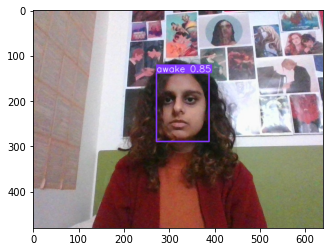

In [33]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [41]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()